# Implementing Mixture of Discrete Logistics

In [118]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import seaborn as sns
import matplotlib.pyplot as plt
tfd = tfp.distributions
tfb = tfp.bijectors

In [121]:
sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)

In [203]:
K = 5
loc = tf.Variable(tf.random.uniform([K]) * 2**16)
unconstrained_scale = tf.Variable(tf.random.uniform([K]) * 2**15)
scale = tf.nn.softplus(unconstrained_scale)
logits = tf.Variable(tf.random.normal([K]))

This is from the `tfd.QuantizedDistribution` documentation

In [204]:
# Form mixture of discretized logistic distributions. Note we shift the
# logistic distribution by -0.5. This lets the quantization capture "rounding"
# intervals, `(x-0.5, x+0.5]`, and not "ceiling" intervals, `(x-1, x]`.
discretized_logistic_dist = tfd.QuantizedDistribution(
    distribution=tfd.TransformedDistribution(
        distribution=tfd.Logistic(loc=loc, scale=scale),
        bijector=tfb.AffineScalar(shift=-0.5)),
    low=0.,
    high=2**16 - 1.)
mixture_dist = tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(logits=logits),
    components_distribution=discretized_logistic_dist)

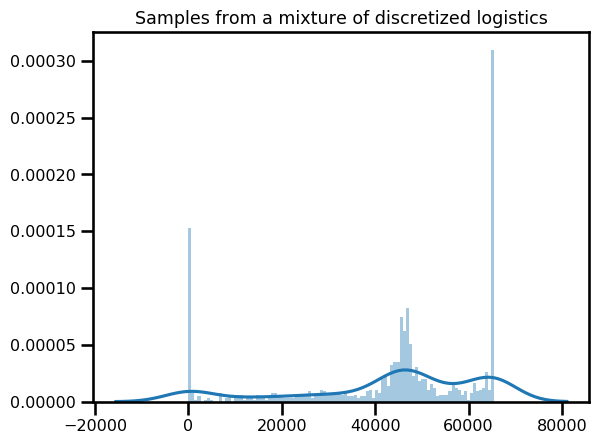

In [205]:
samples = mixture_dist.sample(1000)
sns.distplot(samples, bins=100)
plt.title("Samples from a mixture of discretized logistics")
plt.show()

## Fit to some synthetic data

__TODO__